# Goal of the notebook.  
My aim is to analyze the trends in doge coin market prices. And to build a deeplearning network to predict the future price of DogeCoin.

## Terms meaning:  
Price  :the current value for investors to buy/sell.  
Open   :Opening price for the day.  
High   :Highest price during the day.  
Low    :Lowest price during the day.  
Vol.   :total number of shares traded in a security over a period(day).  
Change :Change in Price from day to day.

## Data-set  
Data set is provided by Tarandeep Singh on [Kaggle](https://www.kaggle.com/tarandeep97/dogecoin-historical-data20172021)

In [266]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Explotary Data Analysis

In [307]:
df= pd.read_csv('Dogecoin Historical Data.csv')

In [308]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1435 non-null   object 
 1   Price     1435 non-null   float64
 2   Open      1435 non-null   float64
 3   High      1435 non-null   float64
 4   Low       1435 non-null   float64
 5   Vol.      1435 non-null   object 
 6   Change %  1435 non-null   object 
dtypes: float64(4), object(3)
memory usage: 78.6+ KB


In [309]:
#EDA
df.describe()

,Price,Open,High,Low
count,1435.000000,1435.000000,1435.000000,1435.000000
mean,0.011895,0.011497,0.013001,0.010444
std,0.048844,0.046533,0.053560,0.041342
min,0.000774,0.000774,0.000793,0.000669
25%,0.002301,0.002301,0.002362,0.002212
50%,0.002746,0.002747,0.002836,0.002634
75%,0.003639,0.003634,0.003822,0.003451
max,0.655355,0.653501,0.693839,0.541526


There is little to no devation in data.

In [310]:
#graph the data
temp= df.sort_index(ascending=False)
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Price'],
                    name='Price'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['High'],
                    name='High'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Low'],
                    name='Low'))

fig.update_layout(
    title="DogeCoin",
    xaxis_title="days",
    yaxis_title="Value in USD",
    
    )

fig.show()

As shwon in the EDA above the data follows the same line with little or no deviation at all.

In [311]:
#convert the object type columns to numerical type
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 07, 2021",0.573179,0.579819,0.598133,0.519357,14.72B,-1.15%
1,"May 06, 2021",0.579839,0.653501,0.663006,0.541526,12.97B,-11.52%
2,"May 05, 2021",0.655355,0.559521,0.693839,0.536232,28.03B,17.24%
3,"May 04, 2021",0.559005,0.438349,0.594039,0.398416,31.90B,27.56%
4,"May 03, 2021",0.438244,0.372467,0.443181,0.372467,9.97B,17.68%
...,...,...,...,...,...,...,...
1430,"Jun 07, 2017",0.003250,0.003617,0.003950,0.003132,1.37M,-10.15%
1431,"Jun 06, 2017",0.003617,0.003718,0.003718,0.003152,2.11M,-2.72%
1432,"Jun 05, 2017",0.003718,0.003770,0.003825,0.002923,4.82M,-1.38%
1433,"Jun 04, 2017",0.003770,0.003213,0.003770,0.002544,5.96M,17.34%


In [312]:
#change the value from - to 0.0, then convert all string to float
df.loc[1396, 'Vol.']='0.0'
df['Volx1M']=df['Vol.'].apply(lambda x : float(x[:-1]) if x[-1] == 'M' else float(x[:-1])*1000 )
df['Change %']=df['Change %'].apply(lambda x : float(x.replace(',','')[:-1]))

In [313]:
#graph the data

temp= df.sort_index(ascending=False)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=(temp['Change %'] - temp['Change %'].min()) / (temp['Change %'].max() - temp['Change %'].min()),
                    name='Change'))
fig.add_trace(go.Scatter(x=temp['Date'], y=(temp['Volx1M'] - temp['Volx1M'].min()) / (temp['Volx1M'].max() - temp['Volx1M'].min()),
                    name='Volume'))
fig.add_trace(go.Scatter(x=temp['Date'], y=(temp['Open'] - temp['Open'].min()) / (temp['Open'].max() - temp['Open'].min()),
                    name='open'))

fig.update_layout(
    title="DogeCoin",
    xaxis_title="Days",
    yaxis_title="",
    
    )

fig.show()

In [326]:
df.describe()

,Price,Change %,Volx1M,target
count,1434.000000,1434.000000,1434.000000,1434.000000
mean,0.011503,5.067064,4533.140307,0.011901
std,0.046555,164.018563,10060.352340,0.048860
min,0.000774,-98.430000,0.000000,0.000774
25%,0.002301,-2.410000,478.222500,0.002301
50%,0.002746,-0.035000,1810.000000,0.002746
75%,0.003635,2.147500,3417.500000,0.003640
max,0.655355,6191.550000,146800.000000,0.655355


After converting Vol. and Change % to numircal values, we can observe that they have high devation which is also supported by graph above

In [314]:
df= df.sort_index(ascending=False).reset_index() #sort data from 2017 to 2021
df.drop(['index','Date', 'Vol.'], axis=1, inplace=True) #drop unimportant columns
df['target']= df['Price'].shift(-1) #create target column by shifting the price column by 1
#save the last point may,7,2021 then drop it
last_point= df.loc[1434]
df.drop(1434, inplace=True)

<AxesSubplot:>

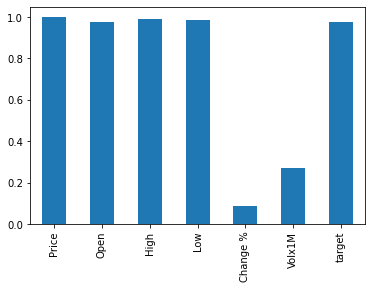

In [318]:
df.corr()['Price'].plot(kind='bar')#graph the corrleation

The graph shows that the open, low, and high attributes do not add any usefull information in predicting the price therefore dropping them will not affect the model's performance.

In [319]:
df.drop(['Open', 'Low', 'High'], axis=1, inplace=True) #drop the unimportant columns

# Splitting data  
method1: use sklearn built in method to split the data randomly  
method2: split the data to two parts 80% train and 20% test

In [320]:
#method 1
from sklearn.model_selection import train_test_split
x=df.drop('target', axis=1)
y=df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [227]:
#method 2
train= df[:round(len(df)*0.8)]
test= df[round(len(df)*0.8):]

In [229]:
x_train=train.drop('target', axis=1)
y_train=train['target']

x_test=test.drop('target', axis=1)
y_test=test['target']

In [321]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [323]:
#reshape data to [samples, timestep, features]
x_train=np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test=np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# RNN Model

In [284]:
#build the model
import tensorflow.keras as keras
model= keras.Sequential()
model.add(keras.layers.LSTM(3, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(keras.layers.LSTM(16, return_sequences=True))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [285]:
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Train on 1147 samples, validate on 287 samples
Epoch 1/100
1147/1147 [==============================] - 11s 10ms/sample - loss: 0.0026 - val_loss: 0.0018
Epoch 2/100
1147/1147 [==============================] - 0s 330us/sample - loss: 0.0025 - val_loss: 0.0018
Epoch 3/100
1147/1147 [==============================] - 1s 445us/sample - loss: 0.0025 - val_loss: 0.0017
Epoch 4/100
1147/1147 [==============================] - 1s 632us/sample - loss: 0.0024 - val_loss: 0.0016
Epoch 5/100
1147/1147 [==============================] - 1s 639us/sample - loss: 0.0022 - val_loss: 0.0015
Epoch 6/100
1147/1147 [==============================] - 0s 417us/sample - loss: 0.0019 - val_loss: 0.0012
Epoch 7/100
1147/1147 [==============================] - 0s 322us/sample - loss: 0.0014 - val_loss: 8.5720e-04
Epoch 8/100
1147/1147 [==============================] - 1s 524us/sample - loss: 9.8452e-04 - val_loss: 6.3545e-04
Epoch 9/100
1147/1147 [==============================] - 1s 625us/sample - loss: 7.46

Epoch 72/100
1147/1147 [==============================] - 1s 524us/sample - loss: 1.6368e-04 - val_loss: 3.7175e-05
Epoch 73/100
1147/1147 [==============================] - 1s 537us/sample - loss: 1.3416e-04 - val_loss: 3.4788e-05
Epoch 74/100
1147/1147 [==============================] - 1s 538us/sample - loss: 1.5769e-04 - val_loss: 5.6153e-05
Epoch 75/100
1147/1147 [==============================] - 1s 537us/sample - loss: 1.6825e-04 - val_loss: 4.8541e-05
Epoch 76/100
1147/1147 [==============================] - 1s 522us/sample - loss: 1.2698e-04 - val_loss: 3.6484e-05
Epoch 77/100
1147/1147 [==============================] - 1s 447us/sample - loss: 1.3524e-04 - val_loss: 3.5213e-05
Epoch 78/100
1147/1147 [==============================] - 1s 546us/sample - loss: 1.2691e-04 - val_loss: 5.5939e-05
Epoch 79/100
1147/1147 [==============================] - 1s 552us/sample - loss: 1.3395e-04 - val_loss: 4.3983e-05
Epoch 80/100
1147/1147 [==============================] - 1s 552us/sampl

# Evaluation  
Since accuracy can't be used, instead squared_mean_error will be used. And since we difined our loss function as squared_mean_error we can use the Val_loss as our metric (the lower the better)

In [286]:
fig = go.Figure()
fig.add_trace(go.Scatter( y=model.history.history['loss'],
                    name='loss'))
fig.add_trace(go.Scatter( y=model.history.history['val_loss'],
                    name='val_loss'))

fig.update_layout(
    title="Loss vs Val_Loss",
    xaxis_title="epochs",
    yaxis_title="loss_value",
    
    )

graph shows that no over fitting occured during training

# Graphing Model predictions

In [325]:
pred = model.predict(x_test)
fig = go.Figure()
fig.add_trace(go.Scatter( y=y_test,
                    name='actual_data'))
fig.add_trace(go.Scatter( y=pred.reshape(pred.shape[0]),
                    name='pred_data'))
fig.update_layout(
    title="Price of Dogecoin (Test Data)",
    xaxis_title="index",
    yaxis_title="Price in USD",
    
    )

In [302]:
test= df[round(len(df)*0.8):]
x_test=test.drop('target', axis=1)
y_test=test['target']
x_test= scaler.transform(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
pred= model.predict(x_test)

In [303]:
fig = go.Figure()
fig.add_trace(go.Scatter( y=y_test,
                    name='actual_data'))
fig.add_trace(go.Scatter( y=pred.reshape(pred.shape[0]),
                    name='pred_data'))

fig.update_layout(
    title="Price of Dogecoin (Last 20%)",
    xaxis_title="index",
    yaxis_title="Price in USD",
    
    )


In [292]:
x=df.drop('target', axis=1)
y=df['target']

x=scaler.transform(x)
x= x.reshape(x.shape[0], 1, x.shape[1])
pred= model.predict(x)

In [301]:
fig = go.Figure()
fig.add_trace(go.Scatter( y=y,
                    name='actual_data'))
fig.add_trace(go.Scatter( y=pred.reshape(pred.shape[0]),
                    name='pred_data'))

fig.update_layout(
    title="Price of Dogecoin (Full Data)",
    xaxis_title="index",
    yaxis_title="Price in USD",
    
    )

Note: model could not predict the abnormal increase in price at index 955

# Conclusion  
Given the sudden changes in the data especially in the last 20% the model performed quite well.  
In the future i could use transformers instead of LSTM and see how it affects performance.